## Question 1
Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)

In [1]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(10)

Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


## Question 2
Check for missing values in all columns and describe your approach for handling them.

In [2]:
# Check missing values
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


**Approach:**
- Keep `ex_showroom_price` as-is (many missing values) and exclude from modeling unless imputed.
- No missing values in critical columns (selling_price, year, km_driven), so no rows dropped.

## Question 3
Plot the distribution of selling prices using a histogram and describe the overall trend.

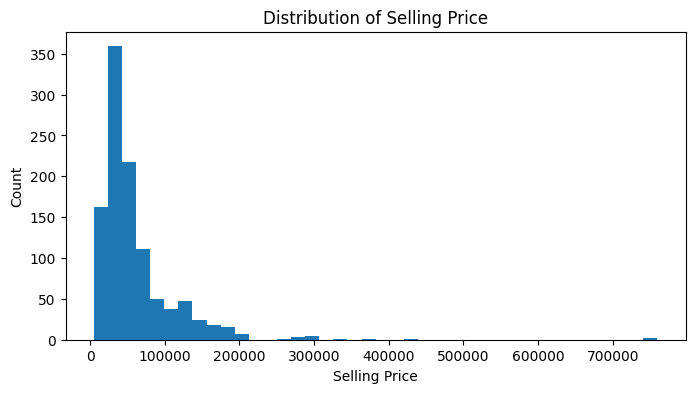

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df['selling_price'], bins=40)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

df['selling_price'].describe()

## Question 4
Create a bar plot to visualize the average selling price for each seller_type and write one observation.

seller_type
Individual    59711.923223
Dealer        46666.666667
Name: selling_price, dtype: float64


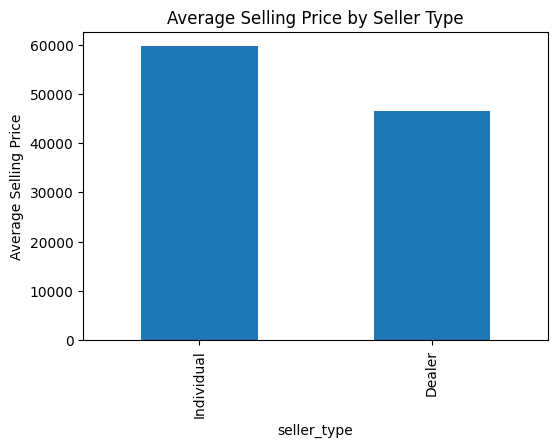

In [4]:
group_seller = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)
print(group_seller)

group_seller.plot(kind='bar', figsize=(6,4), title='Average Selling Price by Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

## Question 5
Compute the average km_driven for each ownership type and present the result as a bar plot.

owner
4th owner    311500.000000
2nd owner     39288.991870
3rd owner     33292.181818
1st owner     32816.583333
Name: km_driven, dtype: float64


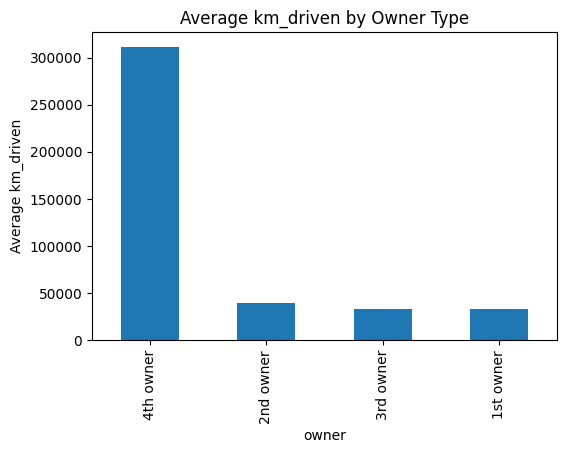

In [5]:
group_owner_km = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)
print(group_owner_km)

group_owner_km.plot(kind='bar', figsize=(6,4), title='Average km_driven by Owner Type')
plt.ylabel('Average km_driven')
plt.show()

## Question 6
Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

Before:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


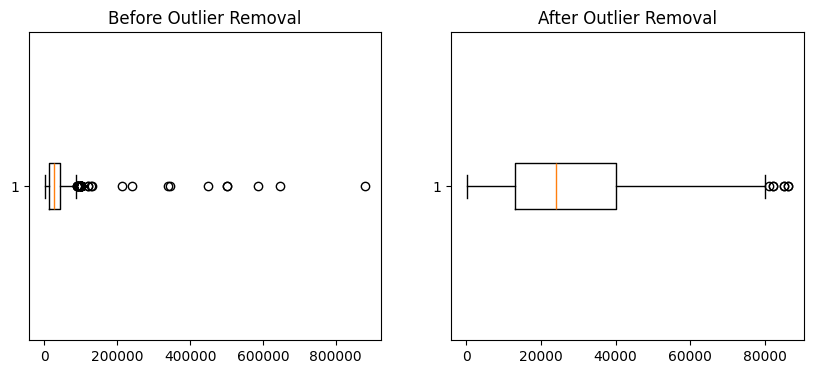

In [8]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Before:")
print(df['km_driven'].describe())

df_no_out = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]
print("\nAfter removing outliers:")
print(df_no_out['km_driven'].describe())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(df['km_driven'], vert=False)
plt.title('Before Outlier Removal')
plt.subplot(1,2,2)
plt.boxplot(df_no_out['km_driven'], vert=False)
plt.title('After Outlier Removal')
plt.show()

## Question 7
Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

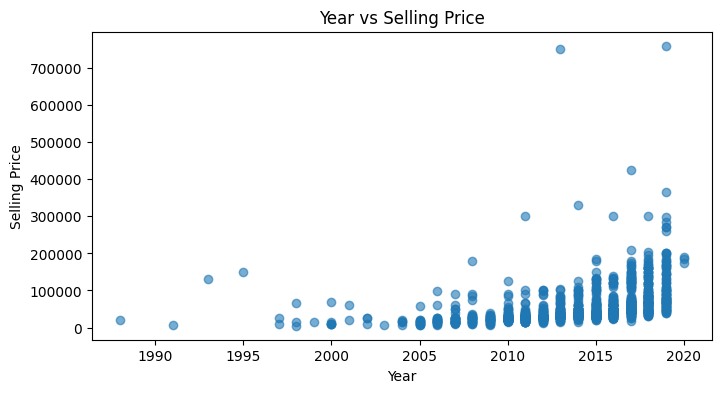

Correlation between year and selling_price: 0.40218840061474403


In [9]:
plt.figure(figsize=(8,4))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

print("Correlation between year and selling_price:", df['year'].corr(df['selling_price']))

## Question 8
Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows.

In [10]:
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller')
df_encoded.filter(like='seller_').head()

,seller_Dealer,seller_Individual
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


## Question 9
Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

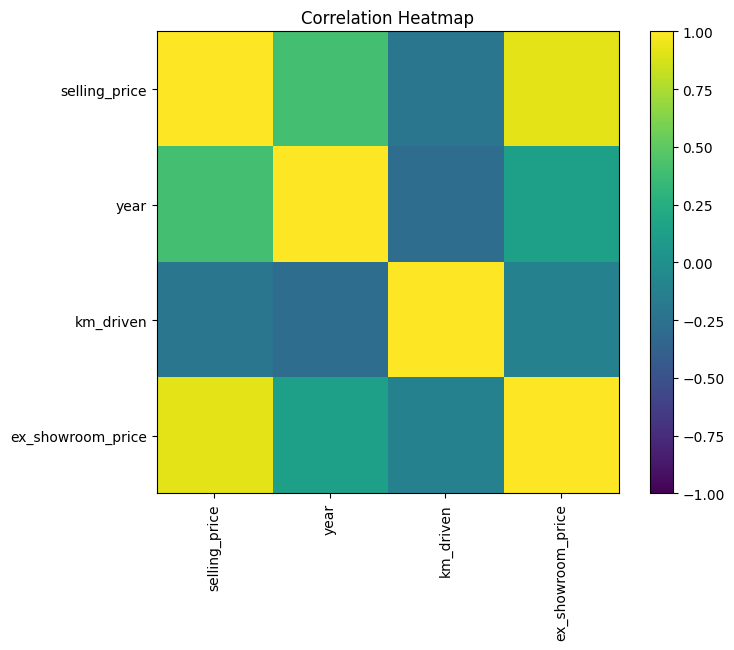

,selling_price
selling_price,1.000000
ex_showroom_price,0.918583
year,0.402188
km_driven,-0.212937


In [11]:
import numpy as np

numeric = df_encoded.select_dtypes(include=[np.number])
corr = numeric.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()

corr['selling_price'].sort_values(ascending=False)

## Question 10
Summarize your findings in a brief report.

**Findings:**
- Selling price is positively correlated with `year` and `ex_showroom_price`.
- Higher `km_driven` tends to lower the selling price.
- Seller type also affects price distribution (some seller types list higher prices).

**Cleaning & Feature Engineering:**
- Handled missing values in `ex_showroom_price` by leaving them as-is.
- Removed outliers from `km_driven` using IQR.
- Created one-hot encoding for seller_type.
- Suggested creating a derived feature: bike age = current_year - year.

**Recommendation:** Use log-transform on selling_price for modeling due to right-skewness.
